In [1]:
import numpy as np

mean_list = np.load('box_shape.npy')
print(mean_list.shape)
print(mean_list.mean(0))

(26195, 2)
[130.61958389 174.30502004]


In [2]:
import pandas as pd
mean_df = pd.DataFrame(mean_list)
mean_df.columns = ['box_width', 'box_height']
mean_df

,box_width,box_height
0,164,210
1,123,162
2,122,156
3,150,201
4,127,166
...,...,...
26190,126,165
26191,165,218
26192,164,224
26193,123,170


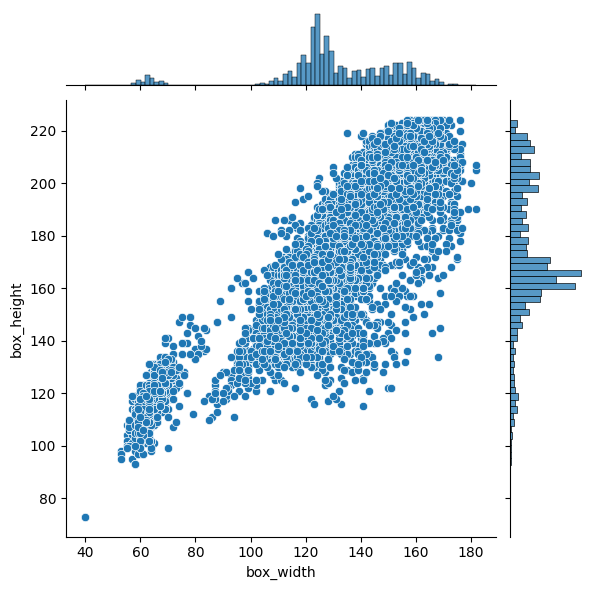

In [4]:
from seaborn import jointplot, regplot
from matplotlib import pyplot as plt
jointplot(x='box_width', y='box_height', data=mean_df)
# regplot(x='box_width', y='box_height', data=mean_df, fit_reg=False)
plt.savefig('face_size.png')

### YOLO

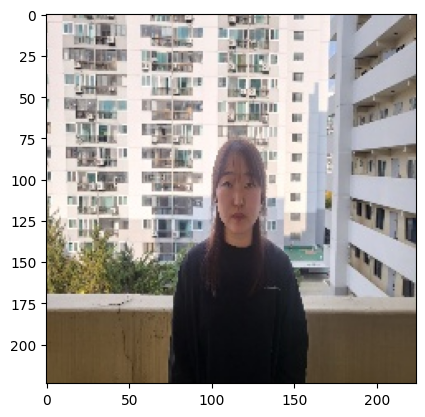

In [49]:
from PIL import Image
from matplotlib import pyplot as plt

path = '/workspace/minsung/Personal_DeepFake_Detect/data/asian_face/aihub_iamge10002008.jpg'
img = Image.open(path)
plt.imshow(img)